##### Saurabh Vaishampayan EP17B028 ep17b028@smail.iitm.ac.in

# Introduction:
In this assignment we will simulate results for the following two questions:

1. Transmission of Raised cosine pulses, effects of truncation, sampling and bandwidth.

2. Finding errors for various constellations: BPSK, QPSK, 16-QAM using full analytical results and different bounds for constant Bit Energy. We then perform Monte-Carlo simulations for QPSK and 16-QAM for symbol error rates and effects of gray coding schemes on bit error rates

3. Each section is a question. One can find the code and solution explanations, plots and conclusions for the question in the respective section.

## Function import
Import numpy and matplotlib libraries and erfc from scipy. We will construct and use functions  based only on these

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Question 1

We use the following pulse shape for transmission of a bit sequence I[n]

$g(t) = sinc(\frac{\pi t}{T})[\frac{cos(\frac{\pi \beta t}{T})}{1-\frac{4 \beta^2 t^2}{T^2}}]$

Here $\beta$ is the excess bandwith factor, T is interval between consecutive zero crossings.

This signal is sampled at $T_s =$ T/J seconds(before fed to a DAC) and truncated to duration 2LT around zero.

The bit sequence $I(kT_s)$, is convolved with $g(kT_s)$ to generate $x(kT_s)$ which is fed to DAC before transmission.

Our task is to transmit a 16 bit sequence using this pulse shape for various values of the parameters and analyse the results

### Define a function that returns the root raised cosine pulse taking as parameters:

In [2]:
def g_pulse(beta,J,L,T):
    '''
    Inputs:
    beta: Excess bandwidth.
    J: No. of samples in a given period.
    L: Truncation factor for the pulse
    T: Period(of zero crossings)
    Returns:
    g: numpy array for the pulse
    '''
    Ts = T/J
    
    t = np.arange(-L*T,L*T,Ts)
    if(beta==0):
        g = np.sinc(t/T)
    else:
        ii = np.where(np.abs(t)==T/(2*beta))
        t = np.delete(t,ii[0])
        g = (np.sinc(t/T))*(np.cos(np.pi*beta*t/T)/(1-((4*(beta**2)*(t**2))/T**2)))
        np.insert(g,ii[0], 0.5*beta*np.sin(np.pi/(2*beta)))
    return g

### Function that generates a random bit sequence. For reproducibility, fix the seed of the RNG

In [3]:
def random_bit_seq(m,p,J,seed_bit):
    '''
    Input
    m: Length of bit sequence
    p: Probability of 1. (1-p) will then be probability of -1.
    J: Sampling rate(per period) for the pulse. Each value(1 or -1) will be succeeded by J-1 zeros
    seed_bit: False for reproducibility(ie if you want the same sequence again and again)
            True if new random sequence desired each time
    '''
    if seed_bit==False:
        np.random.seed(0) # For reproducibility in each run
        # This is if we want same random bit sequence for each run
    
    #Takes the value 1 with probability p and -1 with 1-p
    I = 2*np.less(np.random.rand(m),p*np.ones(m))-np.ones(m)
    temp = np.vstack((I,np.zeros((J-1,m))))
    I_n = np.reshape(temp,(J*m),order='F')
    return I_n

### Code for plots for question 1 a to 1c

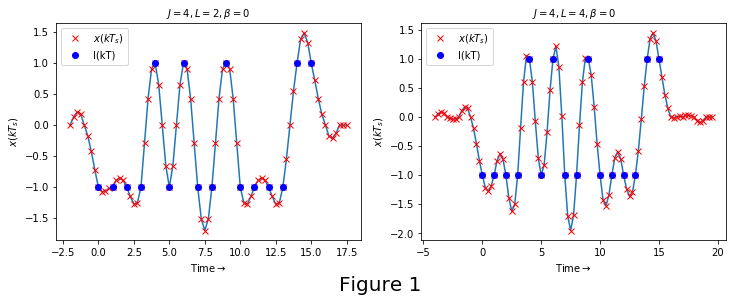

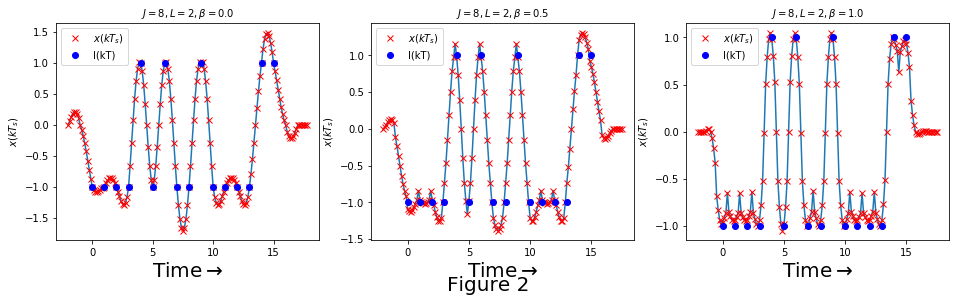

In [5]:
# Since T is the scaling factor for timescale, we set it to 1 for convenience of interpretation.

m = 16 #16 bit sequence
T = 1
# Parameters for 1a:
J = 4
beta = 0
L = 2
#Convolved signal vector x(kTs) and time array
g1a = g_pulse(beta,J,L,T)
I_n = random_bit_seq(m,0.5,J,False)
x1a = np.convolve(I_n,g1a)
t1a = np.arange(-L*T,len(x1a)*(T/J)-L*T,T/J)

# Parameters for 1b:
J = 4
L = 4
beta = 0
#Convolved signal vector x(kTs) and time array
g1b = g_pulse(beta,J,L,T)
I_n = random_bit_seq(m,0.5,J,False)
x1b = np.convolve(I_n,g1b)
t1b = np.arange(-L*T,len(x1b)*(T/J)-L*T,T/J)

# Plots for 1a and 1b:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(t1a,x1a)
ax[0].plot(t1a,x1a,'rx',label=r'$x(kT_s)$')
ax[0].plot(I_n[0::J],'bo',label='I(kT)')
ax[0].set_xlabel('Time'+r'$\rightarrow$',size=10)
ax[0].set_ylabel(r'$x(kT_s)$',size=10)
ax[0].set_title(r'$J=4,L=2,\beta=0$',size=10)
ax[0].legend()

ax[1].plot(t1b,x1b)
ax[1].plot(t1b,x1b,'rx',label=r'$x(kT_s)$')
ax[1].plot(I_n[0::J],'bo',label='I(kT)')
ax[1].set_xlabel('Time'+r'$\rightarrow$',size=10)
ax[1].set_ylabel(r'$x(kT_s)$',size=10)
ax[1].set_title(r'$J=4,L=4,\beta=0$',size=10)
ax[1].legend()
fig.text(.5, -.05, 'Figure 1', ha='center',size=20)
plt.savefig('q1fig1.png')
plt.show()
print('\n\n\n')

#Quesion 1c:
J = 8
L = 2
I_n = random_bit_seq(m,0.5,J,False)
beta_array = np.array([0.,0.5,1.])
g1c = []
x1c = []
t1c = []
fig, ax = plt.subplots(1,len(beta_array),figsize=(16,4))

for i in range(len(beta_array)):
    g1c.append(g_pulse(beta_array[i],J,L,T))
    x1c.append(np.convolve(I_n,g1c[i]))
    t1c.append(np.arange(-L*T,len(x1c[i])*(T/J)-L*T,T/J))
    ax[i].plot(t1c[i],x1c[i])
    ax[i].plot(t1c[i],x1c[i],'rx',label=r'$x(kT_s)$')
    ax[i].plot(I_n[0::J],'bo',label='I(kT)')
    ax[i].set_xlabel('Time'+r'$\rightarrow$',size=20)  
    ax[i].set_ylabel(r'$x(kT_s)$',size=10)
    ax[i].set_title(r'$J=8,L=2,\beta=$'+str(beta_array[i]),size=10)
    ax[i].legend()
    
    
fig.text(.5, -.05, 'Figure 2', ha='center',size=20)
plt.savefig('q1fig2.png')
plt.show()

## Results and Conlusions for Question 1:

1. There are 3 factors at play here: Excess bandwidth factor $\beta$, truncation length factor L and sampling rate per period J.

2. Parts a and b deal with constant $\beta$ and variable truncation length, so we will use this to understand the effect of L. We use the following plot to make it easier to illustrate our findings:
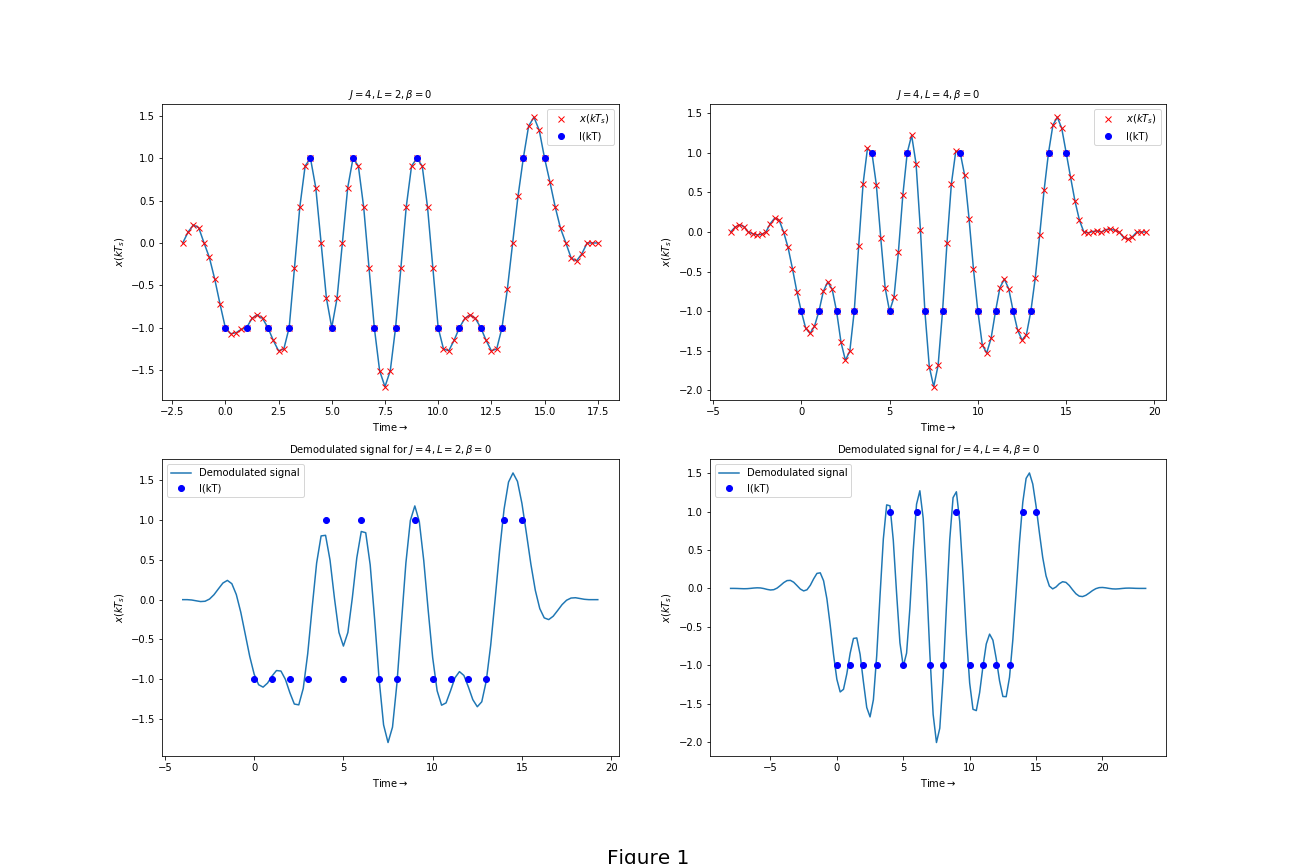


    The plot was generated by a modification of the code used above(we have not included the code here since it is an extra part on my behalf). 
    The first row of the subplots is just the line and symbol plot for $x(kT_s)$, along with additional symbol plot for transmitted symbols I(nT) as blue circles.
    The second row deals with received signal(after passing through the demodulator, ie $x(kT_s)*g(-mT_s)$. The blue circles are again the symbols transmitted ie I(nT).
    
    a. Having low L(truncating too much) will result in higher bandwidth of the transmit pulse, which maybe distorted through a bandlimited channel. 
    b. But truncating less can also cause the following problem depending on pulse shape. In parts a and b we have $\beta=0$, ie a sinc pulse. The issue with sinc pulse is that it decays too slow.
    c. Although we get zero ISI, if sampled properly at receiver, a small timing mismatch can cause problems. If you look at second column in the above figure, you can see that it has sharper features. If not sampled at correct instant, since derivative is higher, one can pick a value much different than the intended(compare it with plot 1, which has a lower value of L(higher truncation).
    d. Thus there is this tradeoff: Lesser truncation means lesser channel distortion, but it can also mean error in recieved samples in case of timing mismatch, because of slow decay of sinc giving sharper features.
    
3. Part c deals with variable $\beta$, while rest of the parameters are kept constant, so we will use this to understand the effect of $\beta$. We use the following plot to make it easier to illustrate our findings:

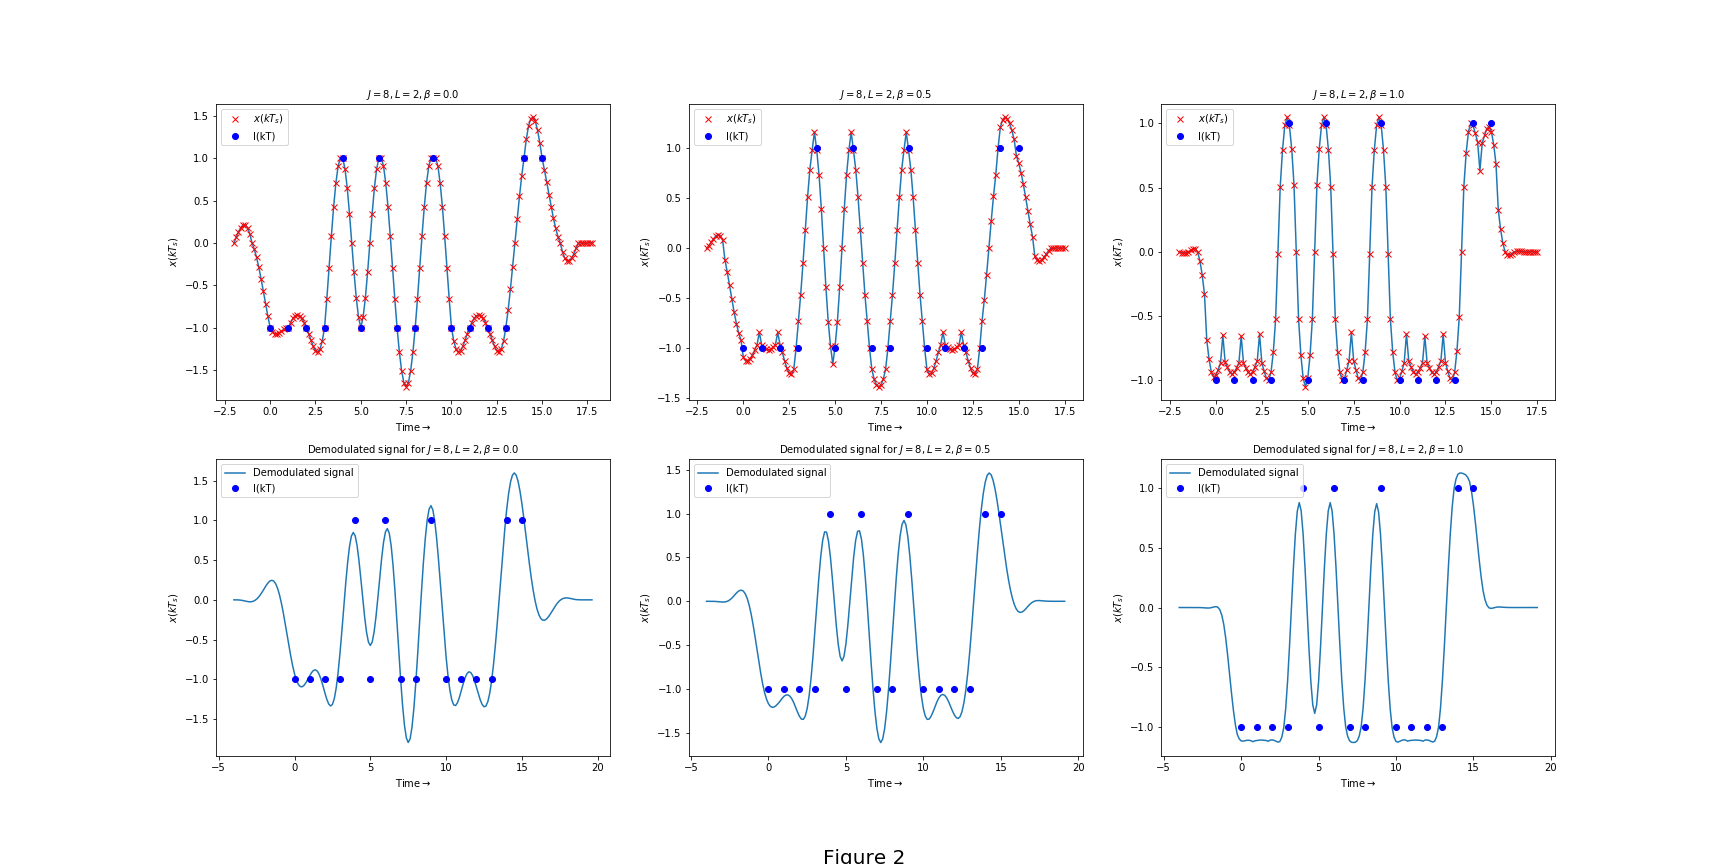


    The plot was generated by a modification of the code used above(we have not included the code here since it is an extra part on my behalf). 
    The first row of the subplots is just the line and symbol plot for $x(kT_s)$, along with additional symbol plot for transmitted symbols I(nT) as blue circles.
    The second row deals with received signal(after passing through the demodulator, ie $x(kT_s)*g(-mT_s)$. The blue circles are again the symbols transmitted ie I(nT).

    a. Having higher value of excess bandwidth means a wastage of bandwidth, because had we used a sinc pulse($\beta=0$) we could have transmitted more information. Higher $\beta$ also means a fast decay in time domain.
    b. But it also guards us against a timing mismatch. If you compare the plots column wise, you can see the following: In the third column, the peaks in the signal are approximately at the location and height of transmitted symbol. The second column does worse but is still better than the first. 
    c. In the demodulated signal, one can see that it is flat around the desired sampling instants, guarding against timing mismatch. If you look at the first column, you can see that although it takes correct values if synchronised in time correctly, but a small time mismatch may result in different interpreted symbol values.
    d. What we want is that the transmitted pulse sequence should have a maxima at the instant symbol is transmitted, so that small deviations in time do not cause wild changes in value. In the demodulated signal this will result in the signal being flat around the deisred time sample instants.
    b. So there is this tradeoff again, higher excess bandwidth guards us against timing mimathces, but we sacrifice bandwidth.
    
    
4. Sampling period J will have to be small enough to avoid aliasing since the signal goes to a DAC converter, but in this problem since we are only asked to plot and conclude based on $x(kT_s)$, it does not play any major role in our analysis, except that it has to be good enough for line plot to be smooth(and this was already taken care of in the question instructions).

# Question 2

Our task is to calculate and simulate error probabilities for BPSK, PQSK, and 16-QAM constellations, for same energy per bit.

1. Calculate theoretical exact expressions for symbol errors for BPSK, QPSK, 16-QAM for constant bit energy(equal to 1) and plot them in the same plot for comparison, for 6 different values of SNR(0dB to 10dB, in steps of 2). Compare the results.

2. For QPSK, plot approximate symbol errors using: Full Union bound, nearest neighbour union bound, Chernoff bound for approximating erfc functions and compare with exact theoretical expression for the same.

3. Monte Carlo simulations for symbol errors for QPSK, plotted in the same plot as for the above.

4. For 16-QAM, plot approximate symbol errors using nearest neigbour Union bound, Chernoff approximation for erfc along with exact theoretical calculations.

5. Monte Carlo simulations for 16-QAM, plotted in the same plot as for above question.

6. Bit Error rates for QPSK and 16-QAM with and without gray coding, all four in the same plot

## Theory

### Notation:

$P_s$: Probability of symbol error

$P_b$: Probability of bit error

$d_{min}$: Minimum distance between 2 points on signal constellation.

$d = d_{min}/2$

$E_s$: Average symbol energy, also given by square of average distance on a constellation.

M: Number of bits per symbol.

$E_b = E_s/M $: Average bit energy

$q =\int_{d}^{\infty} e^{-\frac{x^2}{N_0}} dx = Q(\frac{d}{\sqrt{N_0/2}}) = \frac{1}{2}erfc(\frac{d}{\sqrt{N_0}})$

### Analytical error probabilities for BPSK, QPSK, 16-QAM:

BPSK:

$P_s = q$

QPSK:

$P_s = 1-(1-q)^2 = 2q-q^2$

16-QAM:

$P_s = 1-[\frac{(1-q)^2}{4}+\frac{(1-2q)^2}{4}+\frac{(1-2q)(1-q)}{2}]$

We are given that bit energy $E_b = 1$. Therefore, $d = d_{min}/2$ for each of the above constellations is given by:

$d = \sqrt{E_s} = \sqrt{E_b} = 1$ for BPSK

$d = \sqrt{E_s/2} = \sqrt{\frac{2 E_b}{2}} = 1$ for QPSK

$d = \sqrt{E_s/5} = \sqrt{\frac{2 E_b}{5}} = \sqrt{\frac{2}{5}}$ for 16-QAM

## Question 2a: Plotting theoretical expressions for errors for BPSK, QPSK, 16-QAM

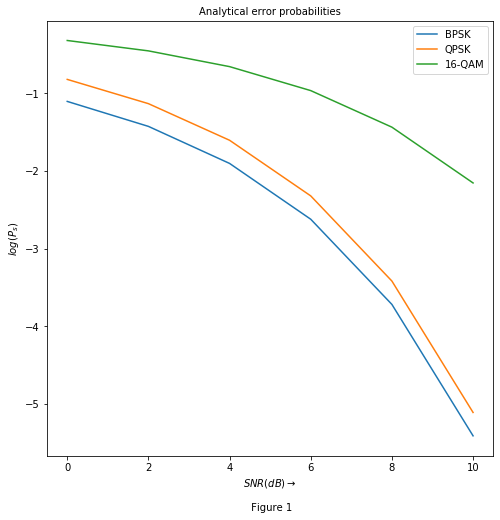

In [6]:
N_0 = np.logspace(0,-1,6) #Noise PSD, from 0dB to -10dB in steps of 2dB, since Eb=1
d_psk = 1. #As showed above, for Eb = 1, d = 1 for both BPSK and QPSK
d_qam = np.sqrt(0.4) #As showed above, d = sqrt(4/5) for 16-QAM

q_bpsk = 0.5*erfc((N_0)**(-0.5))
q_qpsk = 0.5*erfc((N_0)**(-0.5))
q_qam = 0.5*erfc(d_qam*((N_0)**(-0.5)))

ps_bpsk = q_bpsk
ps_qpsk = 2*q_qpsk-q_qpsk**2
ps_16qam = np.ones(len(N_0))-(0.25*((1-q_qam)**2)+0.25*((1-2*q_qam)**2)+0.5*(1-q_qam)*(1-2*q_qam))

SNR = -10*np.log10(N_0)

plt.figure(figsize=(8,8))
plt.plot(SNR,np.log10(ps_bpsk),label='BPSK')
plt.plot(SNR,np.log10(ps_qpsk),label='QPSK')
plt.plot(SNR,np.log10(ps_16qam),label='16-QAM')
plt.xlabel(r'$SNR(dB) \rightarrow$'+'\n\n Figure 1',size=10)
plt.ylabel(r'$log(P_s)$',size=10)
plt.legend()
plt.title('Analytical error probabilities',size=10)
plt.savefig('q2fig1.png')
plt.show()

## Question 2b: Error probabilities for QPSK using bounds

Union bound, assuming all pairwise symbol errors:

$\hat{P_s} = 2q+q'$, where $q = \frac{1}{2}erfc[\frac{d}{\sqrt{N_0}}]$ and $q' = \frac{1}{2}erfc[\frac{d\sqrt{2}}{\sqrt{N_0}}]$

Union bound, assuming only nearest neighbour errors:

$\hat{P_s} = 2q$, where $q = \frac{1}{2}erfc[\frac{d}{\sqrt{N_0}}]$.

Union bound, assuming nearest neighbour errors but with Chernoff bounds for erfc:

$\hat{P_s} = 2q$, where $q = e^{-\frac{d^2}{N_0}}$

In [7]:
q_qpsk = 0.5*erfc((N_0)**(-0.5))
psb1 = 2*q_qpsk+0.5*erfc((2/N_0)**(0.5))
psb2 = 2*q_qpsk
psb3 = 2*np.exp(-1/N_0)

## Function definitions for Monte-Carlo Simulations

#### These functions will be used for both QPSK and 16-QAM simulations.

All these functions are written keeping QAM in mind. QPSK is equivalent to to 4-QAM, so we can freely apply these to QPSK as well. 

The only place where we need to take care is bit decoding for symbols for QPSK: The bits for QPSK are assigned in a cyclic order around the circle, whereas for QAm they are separated into values for components along the axes.

The immediate result from this is: Regular binary coding for QPSK is equal to gray coding with 4-QAM!(and vice versa)

Symbol&nbsp;&nbsp;QPSK&nbsp;&nbsp;4-QAM

(-1,-1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;00&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;00

(1,-1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10

(1,1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;01&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;11

(-1,1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;11&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;01

#### symbol_decode:
This function decodes a complex 2d matrix of received analog values to symbol values in the constellation, based on decision boundaries and returns a complex 2d matrix of symbol values

In [8]:
def symbol_decode(Y,d,n1,n2):
    '''
    d: Half of minimum distance
    Y: Recieved 2d matrix of analog complex values
    n1: Number of symbols in constellation along axis 1
    n1: Number of symbols in constellation along axis 1
    Returns:
    R: Interpreted symbol values
    '''
    y1 = 0.5*((1/d)*np.real(Y)+(n1-1)*np.ones(np.shape(Y)))
    y2 = 0.5*((1/d)*np.imag(Y)+(n2-1)*np.ones(np.shape(Y)))
    
    r1 = np.round(y1)
    r2 = np.round(y2)
    del y1, y2

    r1 = np.clip(r1,0,(n1-1))
    r2 = np.clip(r2,0,(n2-1))

    r1 = 2*r1-(n1-1)*np.ones(np.shape(r1))
    r2 = 2*r2-(n2-1)*np.ones(np.shape(r2))

    R = (r1+1.j*r2)
    del r1, r2
    return R

#### symbol_to_bits_qam
This function converts symbols to bit values, for the QAM constellation.

For QPSK, it will return gray code(explained above;since for PSK bits are assigned in cyclic manner). One can apply gray coding again to get the normal binary coding scheme for QPSK

In [9]:
def symbol_to_bits_qam(X,nx1,nx2):
    '''
    X: 2d complex array of received symbols
    nx1: Number of constellation points along x axis
    nx1 = 2**kx1 where kx1 is an integer
    nx2: Number of constellation points along y axis
    nx2 = 2**kx2 where kx2 is an integer
    Returns
    c: 3d numpy array of datatype bool. The first axis stores the bit sequence
    Example: c[:,i,j] stores bit sequence for (i,j) element in recieved symbol matrix
    '''
    x1 = np.real(X)
    x2 = np.imag(X)
    
    kx1 = int(np.round(np.log2(nx1))) 
    kx2 = int(np.round(np.log2(nx2)))
    rows = len(x1)
    cols = len(x1[0])
    
    r1 = np.array((0.5*(1*x1+(nx1-1)*np.ones(np.shape(x1)))),dtype=np.uint8)
    r1 = r1.reshape((rows*cols,1))
    r2 = np.array((0.5*(x2+(nx2-1)*np.ones(np.shape(x2)))),dtype=np.uint8)
    r2 = r2.reshape((rows*cols,1))
    del x1, x2
    
    r1 = np.array(np.unpackbits(r1,axis=1,count=-(8-kx1),bitorder='little'),np.dtype(bool))
    r2 = np.array(np.unpackbits(r2,axis=1,count=-(8-kx2),bitorder='little'),np.dtype(bool))
    
    r1 = np.flip(r1,axis=1)
    r2 = np.flip(r2,axis=1)
    
    c = np.zeros((kx1+kx2,rows,cols),dtype=bool)
    for i in range(kx1):
        c[i,:,:] = r1[:,i].reshape((rows,cols))
    for i in range(kx1,kx1+kx2):
        c[i,:,:] = r2[:,i-kx1].reshape((rows,cols))
    
    return c

#### bits_to_gray_code

Converts bit array to gray coded bits. Format is the same as output of symbol_to_bits_qam

In [10]:
def bit_to_gray_code(c,n1,n2):
    '''
    n1: number of symbols along x axis
    n2: number of symbols along y axis
    '''  
    k1 = int(np.round(np.log2(n1))) 
    k2 = int(np.round(np.log2(n2)))
    gray_out = np.zeros(np.shape(c),dtype=bool)
    
    gray_out[0,:,:] = c[0,:,:]
    
    gray_out[1:k1,:,:] = np.logical_xor(c[0:k1-1,:,:],c[1:k1,:,:])
    if(k2!=0):
        gray_out[k1,:,:] = c[k1,:,:]
        gray_out[k1+1:,:,:] = np.logical_xor(c[k1:-1,:,:],c[k1+1:,:,:])
    return gray_out

#### bit_err_rate:
Calculates average bit error rate between transmitted and received signals

In [11]:
def bit_err_rate(X,R):
    C = np.logical_xor(X,R)
    Err_temp = np.sum(C,axis=0)
    BitErr = np.mean(Err_temp,axis=0)
    return BitErr

## Simulations for finding error probabilities for QPSK

Sample size = $10^6$

$E_b = 1$ Therefore $d=1$

Noise variance: 1 to 0.1 in 6 logarithmic steps, using logspace.

We simulate for various noise floors and calculate the symbol errors, bit errors with and without gray coding

In [12]:
n_samples = 10**6
N_0 = np.logspace(0,-1,6)
stdev_noise = np.sqrt(0.5*N_0)

x1 = 2*np.less(np.random.rand(n_samples,len(N_0)),0.5*np.ones((n_samples,len(N_0))))-np.ones((n_samples,len(N_0)))
x2 = 2*np.less(np.random.rand(n_samples,len(N_0)),0.5*np.ones((n_samples,len(N_0))))-np.ones((n_samples,len(N_0)))

d = 1
n1 = 2
n2 = 2

X = d*(x1+1.j*x2)
del x1, x2

Noise = stdev_noise*np.random.randn(n_samples,len(N_0))+1.j*stdev_noise*np.random.randn(n_samples,len(N_0))
Y = X+Noise
del Noise

In [13]:
R_ = symbol_decode(Y,d,n1,n2)
R_bit_ = symbol_to_bits_qam(R_,n1,n2)
X_bit_ = symbol_to_bits_qam((1/d)*X,n1,n2)
R_bit = bit_to_gray_code(R_bit_,4,1)
X_bit = bit_to_gray_code(X_bit_,4,1)
Bit_err_qpsk = bit_err_rate(X_bit,R_bit)
Gray_err_qpsk = bit_err_rate(bit_to_gray_code(X_bit_,n1,n2),bit_to_gray_code(R_bit_,n1,n2))

R = d*R_

Err_qpsk = np.zeros((n_samples,len(N_0)))
ii = np.where(R!=X)
Err_qpsk[ii] = 1
p_err_qpsk = np.mean(Err_qpsk,axis=0)
del Err_qpsk, X, R, R_, R_bit_,X_bit

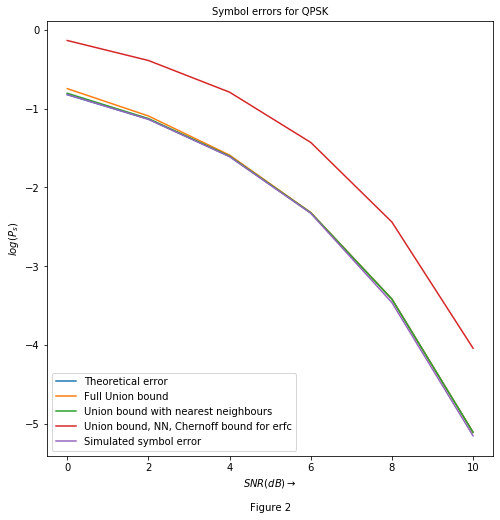

In [14]:
SNR = -10*np.log10(N_0)
q_qpsk = 0.5*erfc((N_0)**(-0.5))
ps_qpsk = 2*q_qpsk-q_qpsk**2

plt.figure(figsize=(8,8))
plt.plot(SNR,np.log10(ps_qpsk),label='Theoretical error')
plt.plot(SNR,np.log10(psb1),label='Full Union bound')
plt.plot(SNR,np.log10(psb2),label='Union bound with nearest neighbours')
plt.plot(SNR,np.log10(psb3),label='Union bound, NN, Chernoff bound for erfc')
plt.plot(SNR,np.log10(p_err_qpsk),label='Simulated symbol error')
plt.xlabel(r'$SNR(dB) \rightarrow$'+'\n\nFigure 2',size=10)
plt.ylabel(r'$log(P_s)$',size=10)
plt.legend()
plt.title('Symbol errors for QPSK',size=10)
plt.savefig('q2fig2.png')
plt.show()

## Monte Carlo Simulations for 16-QAM

$E_b = 1$ Therefore, d = $\sqrt{2/5}$

Sample size: $10^6$

In [15]:
#16-QAM sequence of random symbols

n_samples = 10**6
N_0 = np.logspace(0,-1,6)
l = len(N_0)
stdev_noise = np.sqrt(0.5*N_0)
d = np.sqrt(0.4)

#Number of points in constellation along x and y axis
n1 = 4 
n2 = 4

rand1 = np.random.rand(n_samples,l)
rand2 = np.random.rand(n_samples,l)

#Real and imaginary part of X, initialising as random choice of -3,-1,1,3
x1 = -3*(np.less(rand1,0.25*np.ones((n_samples,l))))+\
-1*(np.less(rand1,0.5*np.ones((n_samples,l)))&np.greater(rand1,0.25*np.ones((n_samples,l))))+\
1*(np.less(rand1,0.75*np.ones((n_samples,l)))&np.greater(rand1,0.5*np.ones((n_samples,l))))+\
3*(np.greater(rand1,0.75*np.ones((n_samples,l))))


x2 = -3*(np.less(rand2,0.25*np.ones((n_samples,l))))+\
-1*(np.less(rand2,0.5*np.ones((n_samples,l)))&np.greater(rand2,0.25*np.ones((n_samples,l))))+\
1*(np.less(rand2,0.75*np.ones((n_samples,l)))&np.greater(rand2,0.5*np.ones((n_samples,l))))+\
3*(np.greater(rand2,0.75*np.ones((n_samples,l))))

X = d*(x1+1.j*x2)
del x1, x2

#Add noise
Noise = stdev_noise*np.random.randn(n_samples,len(N_0))+1.j*stdev_noise*np.random.randn(n_samples,len(N_0))
Y = X+Noise
del Noise

In [16]:
R_ = symbol_decode(Y,d,n1,n2) #Decode the received analog signal to symbols
R_bit = symbol_to_bits_qam(R_,n1,n2) #Convert received symbol to bits
X_bit = symbol_to_bits_qam((1/d)*X,n1,n2) #Convert transmit symbol to bits
Bit_err_qam = bit_err_rate(X_bit,R_bit) #Calculate bit error with regular encoding
Gray_err_qam = bit_err_rate(bit_to_gray_code(X_bit,n1,n2),bit_to_gray_code(R_bit,n1,n2)) #Bit err, gray coding

#Calculate symbol error
R = d*R_

Err_qam = np.zeros((n_samples,len(N_0)))
ii = np.where(R!=X)
Err_qam[ii] = 1
p_err_qam = np.mean(Err_qam,axis=0)
del Err_qam, X, R, R_, R_bit, X_bit

## Bounds for 16-QAM:

$E_b = 1$. Therfore $d = \sqrt{\frac{2}{5}}$

Union bound, assuming only nearest neighbour errors:

$\hat{P_s} = \frac{4q}{4}+\frac{3q}{2}+\frac{2q}{4} = 3q$, where $q = \frac{1}{2}erfc[\frac{d}{\sqrt{N_0}}]$.

Union bound, assuming nearest neighbour errors but with Chernoff bounds for erfc:

$\hat{P_s} = 3q$, where $q = e^{-\frac{d^2}{N_0}}$

In [17]:
q_qam = 0.5*erfc((2/(5*N_0))**(0.5)) #q value for 16-QAM
pse1 = 3*q_qam #bounds for Q2e1
pse2 = 3*np.exp(-0.4/N_0) #Bounds for Q2e2

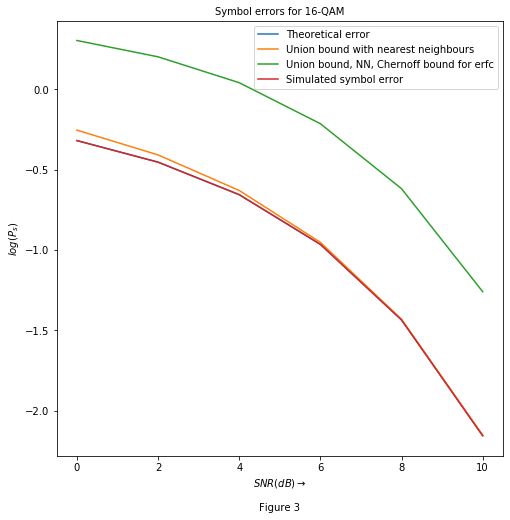

In [18]:
SNR = -10*np.log10(N_0)

#Calculate theoretical exact result for 16-QAM symbol error
ps_16qam = np.ones(len(N_0))-(0.25*((1-q_qam)**2)+0.25*((1-2*q_qam)**2)+0.5*(1-q_qam)*(1-2*q_qam))

#Plotting
plt.figure(figsize=(8,8))
plt.plot(SNR,np.log10(ps_16qam),label='Theoretical error')
plt.plot(SNR,np.log10(pse1),label='Union bound with nearest neighbours')
plt.plot(SNR,np.log10(pse2),label='Union bound, NN, Chernoff bound for erfc')
plt.plot(SNR,np.log10(p_err_qam),label='Simulated symbol error')
plt.xlabel(r'$SNR(dB) \rightarrow$'+'\n\nFigure 3',size=10)
plt.ylabel(r'$log(P_s)$',size=10)
plt.legend()
plt.title('Symbol errors for 16-QAM',size=10)
plt.savefig('q2fig3.png')
plt.show()

## Plots for bit errors with and without Gray coding

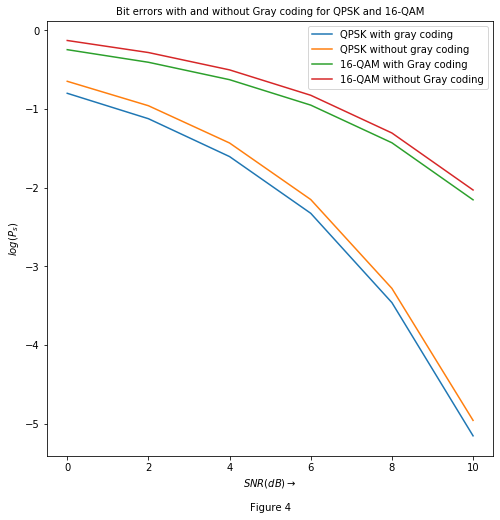

In [19]:
plt.figure(figsize=(8,8))
plt.plot(SNR,np.log10(Gray_err_qpsk),label='QPSK with gray coding')
plt.plot(SNR,np.log10(Bit_err_qpsk),label='QPSK without gray coding')
plt.plot(SNR,np.log10(Gray_err_qam),label='16-QAM with Gray coding')
plt.plot(SNR,np.log10(Bit_err_qam),label='16-QAM without Gray coding')
plt.xlabel(r'$SNR(dB) \rightarrow$'+'\n\nFigure 4',size=10)
plt.ylabel(r'$log(P_s)$',size=10)
plt.legend()
plt.title('Bit errors with and without Gray coding for QPSK and 16-QAM',size=10)
plt.savefig('q2fig4.png')
plt.show()

## Comparing bit errors with and without gray coding

In [20]:
print('==============')
print('Comparison for QPSK')
print('\n')
print('SNR   0dB        2dB         4dB         6dB        8dB        10dB')
print('Symbol Error')
print(p_err_qpsk)
print('\n')
print('Bit Error with gray coding')
print(Gray_err_qpsk)
print('\n')
print('Bit Error without gray coding')
print(Bit_err_qpsk)
print('\n')

print('==============')
print('Comparison for 16-QAM')
print('\n')
print('SNR  0dB     2dB     4dB     6dB     8dB     10dB')
print('Symbol Error')
print(p_err_qam)
print('\n')
print('Bit Error with gray coding')
print(Gray_err_qam)
print('\n')
print('Bit Error without gray coding')
print(Bit_err_qam)

Comparison for QPSK


SNR   0dB        2dB         4dB         6dB        8dB        10dB
Symbol Error
[1.5118e-01 7.3494e-02 2.4571e-02 4.7000e-03 3.4500e-04 7.0000e-06]


Bit Error with gray coding
[1.57467e-01 7.48710e-02 2.47230e-02 4.70500e-03 3.45000e-04 7.00000e-06]


Bit Error without gray coding
[2.23687e-01 1.09466e-01 3.67770e-02 7.03700e-03 5.23000e-04 1.10000e-05]


Comparison for 16-QAM


SNR  0dB     2dB     4dB     6dB     8dB     10dB
Symbol Error
[0.479179 0.351342 0.220782 0.108251 0.036691 0.006963]


Bit Error with gray coding
[0.564282 0.390306 0.234468 0.111432 0.037025 0.006977]


Bit Error without gray coding
[0.738142 0.518888 0.312313 0.148639 0.049291 0.009302]


**Thus one can see from the above data that bit error for gray coding closely follows symbol error while that for without gray coding is significantly different. Even for with gray coding, there is some slight deviation for low SNR, because there is a significant probability of errors beyond nearest neighbours, but the difference between symbol error and bit error with gray coding bceomes very small at high SNR. But for bit error without gray coding, the difference still persists at even 10dB of SNR**

## Observations and conclusions for Question 2:

1. In Figure 1 for question 2, we can see clearly that probability of symbol error is in the order 16-QAM>QPSK>BPSK. This can be easily explained by the fact that average multiplicity for 16-QAM is the highest followed by QPSK and then BPSK. Also if energy per bit is kept constant, the minimum distance between two points is least for 16-QAM, and BPSK and QPSK have same $d_{min}$. The tie for BPSK and QPSK is broken by multiplicity. This agrees with the conclusion from the image(given below again) that BPSK and QPSK follow each other relatively closely and there is a significant difference between them and 16-QAM.
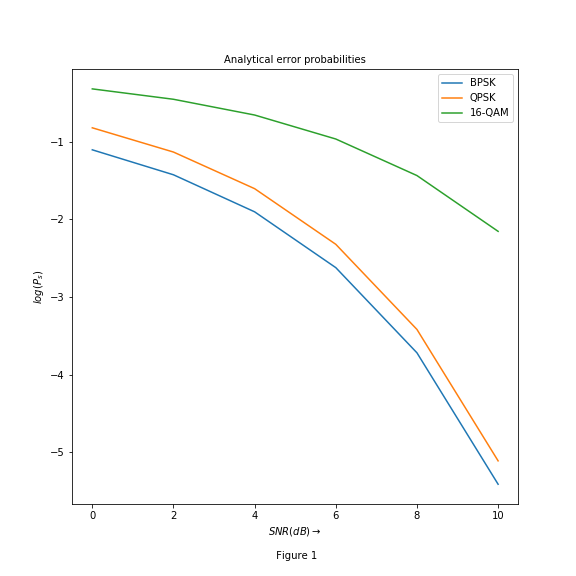

2. In Figure 2 for question 2, we have plotted 5 things on the same plot: Theroetical symbol error, symbol error with full union bounds, symbol error with nearest neighbour union bound, and minimum distance union bound error with Chernoff bound for erfc. One can see that the Chernoff bound is very poor in terms of error probabilities, although it appears to be roughly just vertically shifted in the log scale(meaning a multiplicative constant, so it is probably a good rough guess for general trend of error. The full union bound appears to be slightly different for low SNRs, but grows closer to the rest. Our Monte Carlo Simulations agree very well with the theroretical calculations and also with minimum distance union bound.
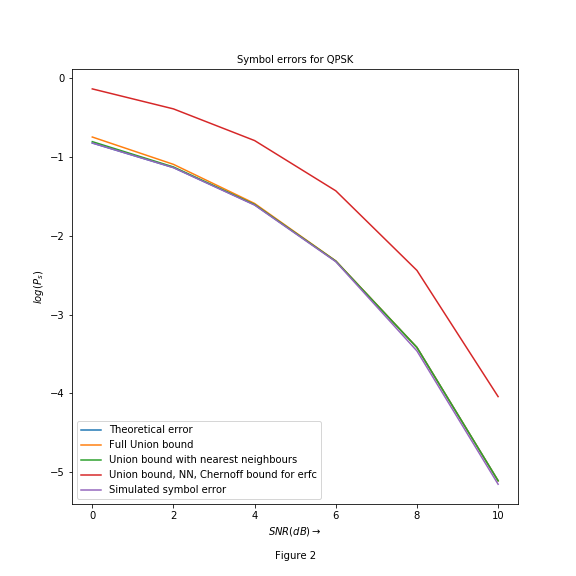

3. In Figure 3, we have plotted 4 things: Theoretical symbol error, Monte Carlo simulated symbol error, symbol error with nearest neighbour union bound, and min distance union bound error with Chernoff bound for erfc. Again, one can see that Chernoff bound is the poorest, it is larger, but since it is roughly vertically shifted up in log scale (meaning a multiplicative constant, so it is probably a good rough guess for general trend of error with SNR. The Union bound with nearest neighbours differs at low SNR, but works quite well at high SNR. The Monte Carlo Simulations and Theoretical estimates agree perfectly.
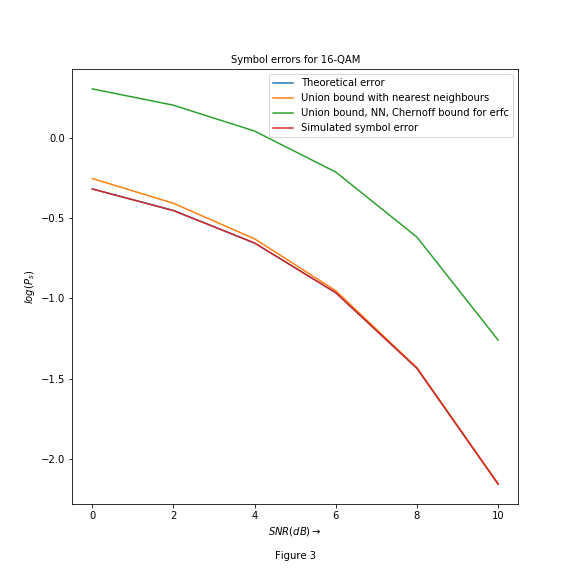

4. In figure 4, we have plotted: Bit error with and without gray coding for 16-QAM and QPSK. We have already seen earlier that symbol error for 16-QAM is higher than QPSK(for same bit energy). The bit error also follows the same trend, with 16-QAM visibly separated from QPSK in the plot(higher error). There is also clear differnce with and without gray coding:Gray coding gives lower errors in both cases. Also, repeating the conclusion obtained from printing data of the two bitwise errors and symbol errors obtained in just the preceding section: One can see from the above data that bit error for gray coding closely follows symbol error while that for without gray coding is significantly different. Even for with gray coding, there is some slight deviation for low SNR, because there is a significant probability of errors beyond nearest neighbours, but the difference between symbol error and bit error with gray coding bceomes very small at high SNR. But for bit error without gray coding, the difference still persists at even 10dB of SNR
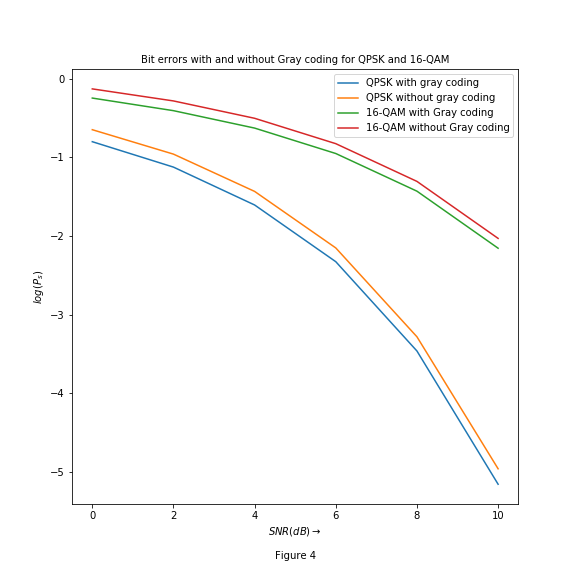